In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


(60000, 785)
(60000, 785)
0
0


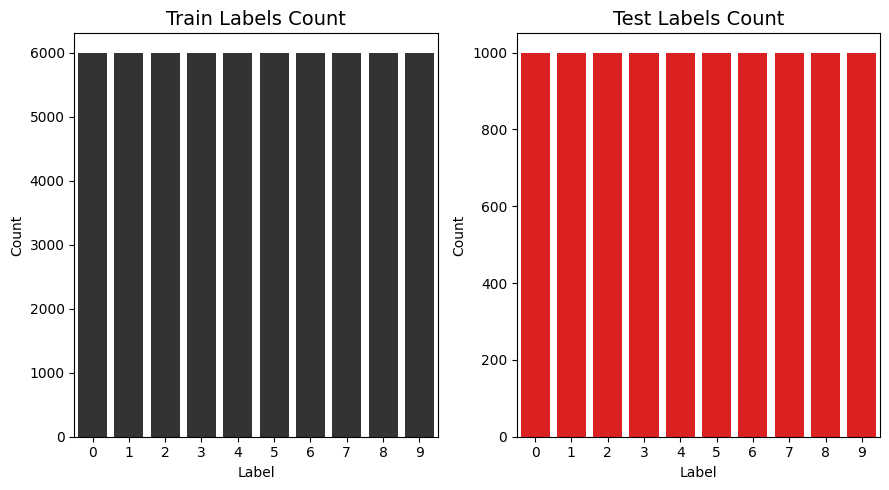

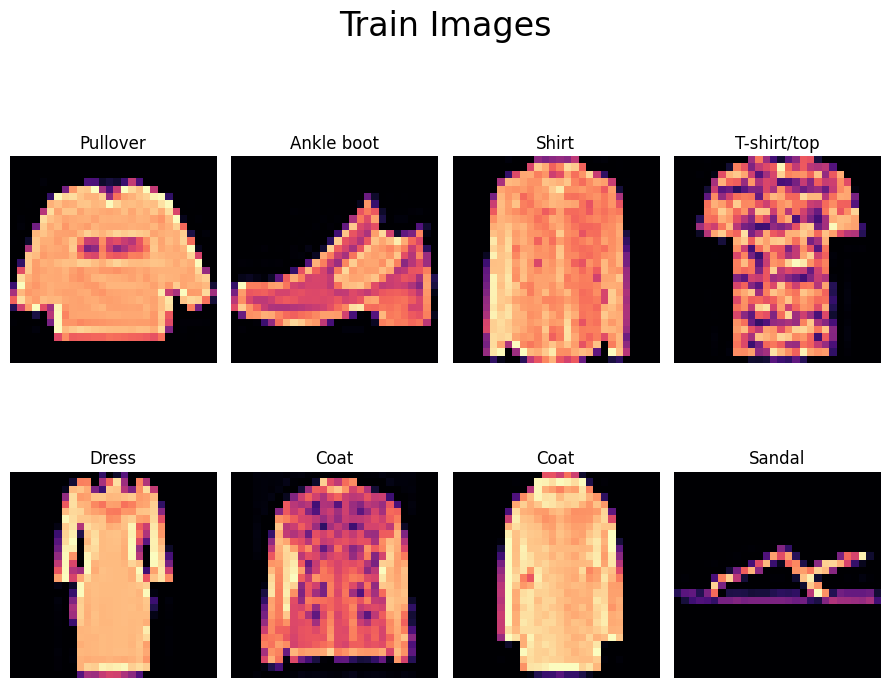

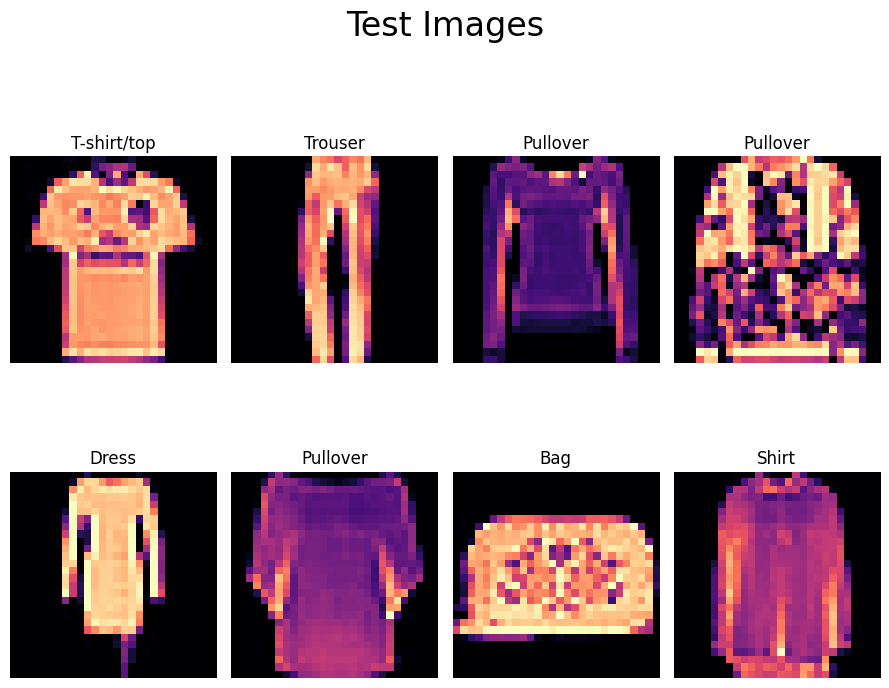

In [19]:
# for ploting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

print(train.shape)
print(train.shape)

train.head(5)
test.head(5)

# checking null values
print(train.isna().sum().sum())
print(test.isna().sum().sum())

# actural item corresponding to each label
item = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


plt.figure(figsize=(9, 5))

# Train labels plot
plt.subplot(1, 2, 1)
sns.countplot(x='label', data=train, palette=['#333333']*len(train['label'].unique()))
plt.title('Train Labels Count', fontsize=14)
plt.xlabel('Label')
plt.ylabel('Count')

# Test labels plot
plt.subplot(1, 2, 2)
sns.countplot(x='label', data=test, palette=['#fb0203']*len(test['label'].unique()))
plt.title('Test Labels Count', fontsize=14)
plt.xlabel('Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2, 4, figsize=(9, 8))
fig.suptitle('Train Images', fontsize=24)

for i, (ind, row) in enumerate(train.iloc[:8, :].iterrows()):
    ax = axes[i // 4, i % 4]   # select subplot
    img = row.to_numpy()[1:].reshape(28, 28)  # pixels only
    ax.imshow(img, cmap='magma')
    ax.set_title(item[row.iloc[0]])  # label from first column
    ax.axis('off')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 4, figsize=(9, 8))
fig.suptitle('Test Images', fontsize=24)

for i, (ind, row) in enumerate(test.iloc[:8, :].iterrows()):
    ax = axes[i // 4, i % 4]   # pick correct subplot
    img = row.to_numpy()[1:].reshape(28, 28)  # reshape pixels
    ax.imshow(img, cmap='magma')
    ax.set_title(item[row.iloc[0]])  # label text from first col
    ax.axis('off')

plt.tight_layout()
plt.show()


In [20]:
# Split into image pixels and labels
X_train = train.iloc[:, 1:].to_numpy()
y_train = train['label'].to_numpy()

X_test = test.iloc[:, 1:].to_numpy()
y_test = test['label'].to_numpy()

print("Shapes before reshape:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)


Shapes before reshape:
X_train: (60000, 784)
y_train: (60000,)
X_test : (10000, 784)
y_test : (10000,)


In [21]:
# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# Reshape to 28x28x1
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

print("After reshape:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)


After reshape:
X_train: (60000, 28, 28, 1)
X_test : (10000, 28, 28, 1)


In [22]:


y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc  = to_categorical(y_test, num_classes=10)
for i in [X_train, y_train_enc, X_test, y_test_enc]:
    print(i.shape)



(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [23]:
import itertools

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 2


In [25]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # ✅ matches one-hot encoding
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:


history = model.fit(
    X_train, y_train_enc,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=VERBOSE,
    validation_split=0.2
)


Epoch 1/10
375/375 - 6s - 15ms/step - accuracy: 0.7690 - loss: 0.6299 - val_accuracy: 0.8270 - val_loss: 0.4631
Epoch 2/10
375/375 - 2s - 4ms/step - accuracy: 0.8625 - loss: 0.3821 - val_accuracy: 0.8752 - val_loss: 0.3478
Epoch 3/10
375/375 - 2s - 4ms/step - accuracy: 0.8838 - loss: 0.3224 - val_accuracy: 0.8885 - val_loss: 0.3095
Epoch 4/10
375/375 - 2s - 4ms/step - accuracy: 0.8963 - loss: 0.2864 - val_accuracy: 0.8999 - val_loss: 0.2867
Epoch 5/10
375/375 - 2s - 4ms/step - accuracy: 0.9047 - loss: 0.2625 - val_accuracy: 0.8957 - val_loss: 0.2915
Epoch 6/10
375/375 - 2s - 4ms/step - accuracy: 0.9114 - loss: 0.2410 - val_accuracy: 0.8961 - val_loss: 0.2852
Epoch 7/10
375/375 - 2s - 4ms/step - accuracy: 0.9199 - loss: 0.2194 - val_accuracy: 0.9053 - val_loss: 0.2695
Epoch 8/10
375/375 - 2s - 4ms/step - accuracy: 0.9248 - loss: 0.2016 - val_accuracy: 0.9019 - val_loss: 0.2800
Epoch 9/10
375/375 - 2s - 4ms/step - accuracy: 0.9304 - loss: 0.1885 - val_accuracy: 0.9078 - val_loss: 0.2638


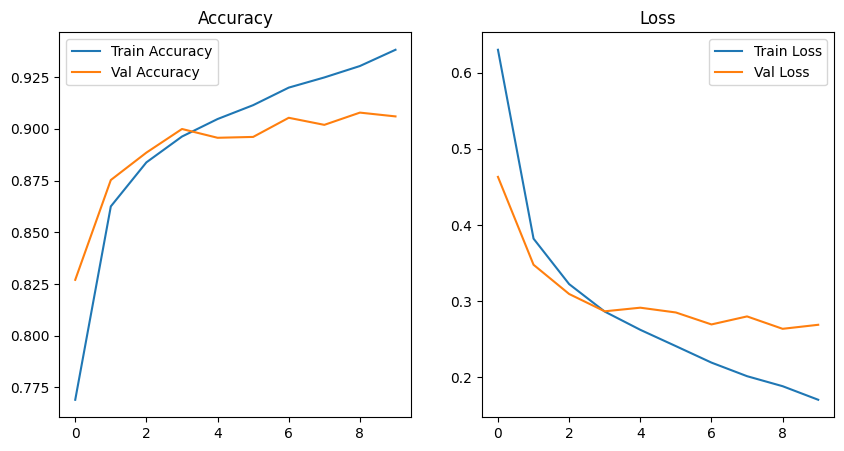

In [27]:
plt.figure(figsize=(10, 5))
# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

In [28]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.98      0.99      0.99      1000
           2       0.90      0.81      0.85      1000
           3       0.92      0.93      0.93      1000
           4       0.83      0.92      0.87      1000
           5       0.99      0.96      0.98      1000
           6       0.77      0.73      0.75      1000
           7       0.94      0.97      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



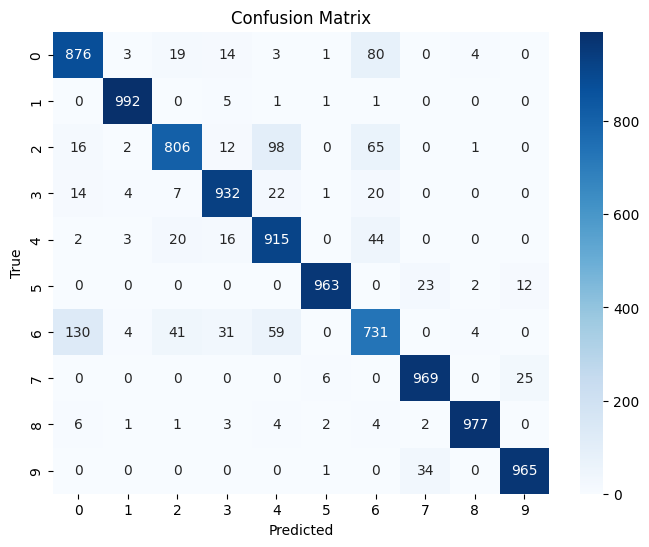

In [29]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


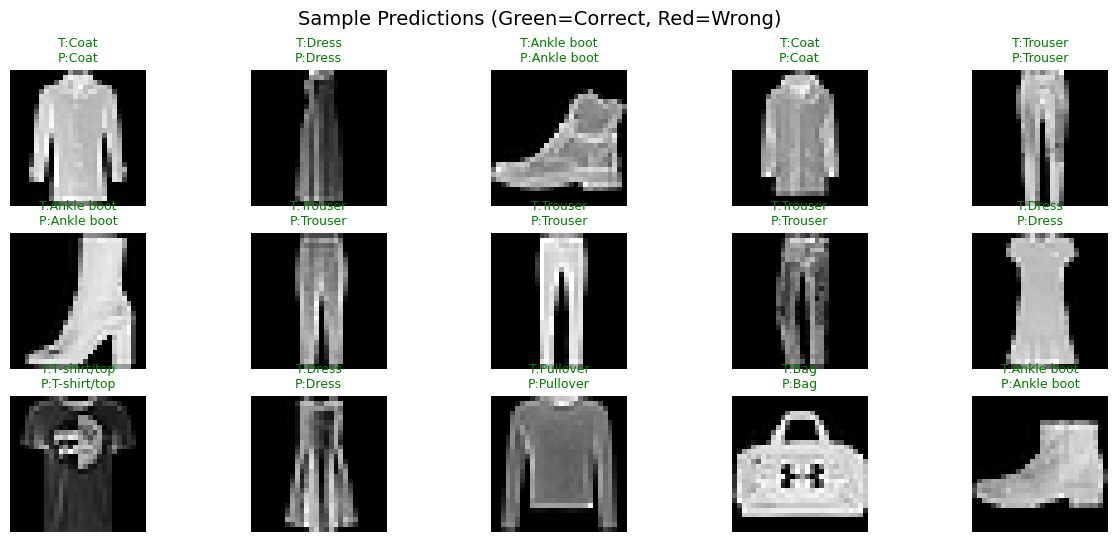

In [30]:
# ===============================
# 11. Visualize Predictions
# ===============================

# Fashion-MNIST label map
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Pick 15 random test images
indices = np.random.choice(len(X_test), 15, replace=False)
sample_images = X_test[indices]
sample_labels = y_test[indices]
sample_preds = np.argmax(model.predict(sample_images), axis=1)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(indices):
    plt.subplot(3, 5, i+1)
    plt.imshow(sample_images[i].reshape(28,28), cmap="gray")
    true_label = label_names[sample_labels[i]]
    pred_label = label_names[sample_preds[i]]
    
    color = "green" if sample_labels[i] == sample_preds[i] else "red"
    plt.title(f"T:{true_label}\nP:{pred_label}", color=color, fontsize=9)
    plt.axis("off")

plt.suptitle("Sample Predictions (Green=Correct, Red=Wrong)", fontsize=14)
plt.show()


In [31]:
model.save("fashion_mnist_cnn.keras")
print("Model saved as fashion_mnist_cnn.keras ✅")

Model saved as fashion_mnist_cnn.keras ✅
